In [1]:
import numpy as np # linear algebra
import pandas as pd # processing data 
import matplotlib.pyplot as plt 
import seaborn as sns # visualization tool
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
dataset = pd.read_csv('BlackFriday.csv')
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# remove NaN values and set it to 0
dataset.Product_Category_2.fillna(0, inplace=True)
dataset.Product_Category_3.fillna(0, inplace=True)

dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [4]:
# Categorised String data like City_Category, Age and Gender to numeric data
dataset['City_Category'] = dataset['City_Category'].astype('category').cat.codes
dataset['Age'] = dataset['Age'].astype('category').cat.codes
dataset['Gender'] = dataset['Gender'].astype('category').cat.codes
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype('category').cat.codes
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969


In [5]:
# Separated input(X) and output(Y)
X = dataset.iloc[:, 2:-1]
Y = dataset.iloc[:, 11]
x_train = np.asarray(X)
Y_train = np.asarray(Y)
y_train = Y_train.reshape(537577,1)
print(x_train.shape)
print(y_train.shape)

(537577, 9)
(537577, 1)


In [6]:
print (X.dtypes)


Gender                           int8
Age                              int8
Occupation                      int64
City_Category                    int8
Stay_In_Current_City_Years       int8
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object


In [7]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [10]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=200):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,10))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [11]:
lr =0.01
n_iter = 2000

theta = np.random.randn(10,1)

X_b = np.c_[np.ones((len(x_train),1)),x_train]
theta,cost_history,theta_history = gradient_descent(X_b,y_train,theta,lr,n_iter)




In [12]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f},\nTheta2:        {:0.3f}'.format(theta[0][0],theta[1][0],theta[2][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          -9989891.223,
Theta1:          -7714732.908,
Theta2:        -25741025.699
Final cost/MSE:  703775212554190466990095728640.000


In [13]:
print(theta)

[[-9.98989122e+06]
 [-7.71473291e+06]
 [-2.57410257e+07]
 [-1.02977050e+08]
 [-1.05964371e+07]
 [-1.88821948e+07]
 [-4.16729689e+06]
 [-5.41085305e+07]
 [-8.48922244e+07]
 [-4.72249398e+07]]


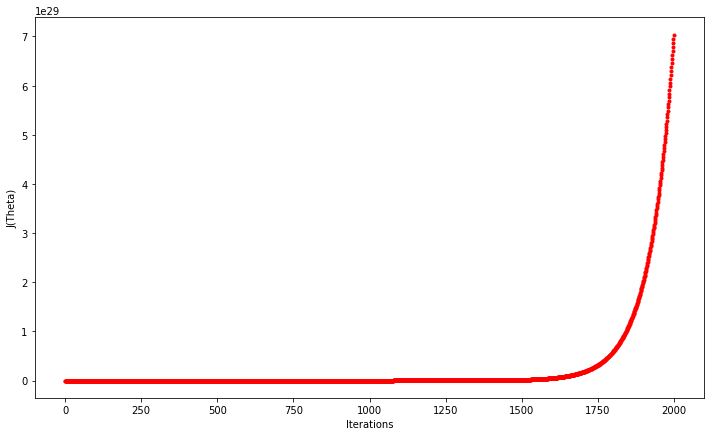

In [19]:
fig,ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'r.')

In [108]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [109]:
lr =0.5
n_iter = 50

theta = np.random.randn(10,1)

X_b = np.c_[np.ones((len(x_train),1)),x_train]
theta,cost_history = stocashtic_gradient_descent(X_b,y_train,theta,lr,n_iter)


print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          7399.996,
Theta1:          1116.844
Final cost/MSE:  5830752929769.108


In [111]:
print(theta)

[[7399.99556983]
 [1116.84353178]
 [ 220.38109785]
 [  13.21350627]
 [ 525.69496668]
 [ 134.68930913]
 [  48.55234374]
 [-248.78755158]
 [  27.55539104]
 [ 170.12455473]]


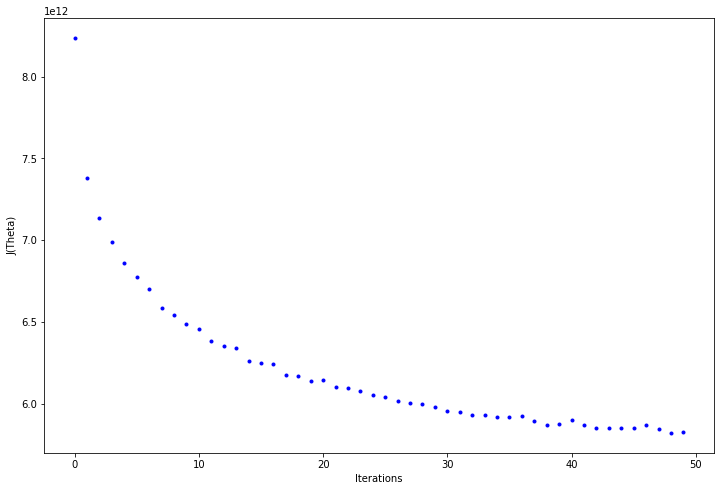

In [110]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [21]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [25]:
lr =0.1
n_iter = 200

theta = np.random.randn(10,1)


theta,cost_history = minibatch_gradient_descent(x_train,y_train,theta,lr,n_iter)


#print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))


Final cost/MSE:  117677250629950.156


NameError: name 'Theta' is not defined

In [26]:
print('Theta values :  ', theta)

Theta values :   [[6749.69569469]
 [1308.94905293]
 [ 262.27151461]
 [  24.78840842]
 [ 585.23131454]
 [ 175.05672524]
 [  81.95386917]
 [-239.19795521]
 [  32.63810953]
 [ 177.15839007]]


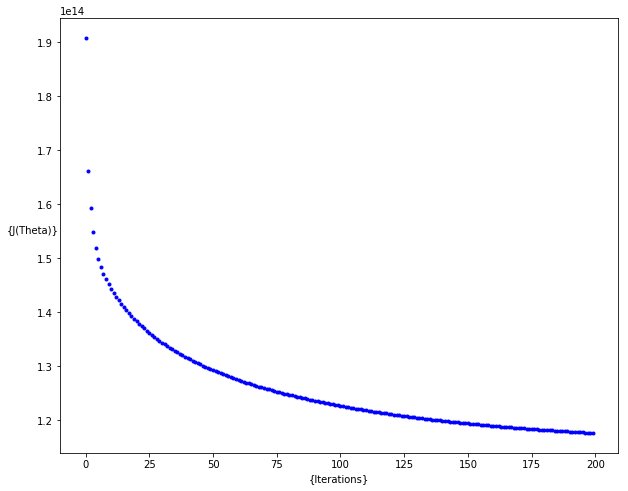

In [27]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')
